<a href="https://colab.research.google.com/github/LuisAlberto99/skills-introducci-n-github/blob/main/Tarea_2_Dacomba_M%C3%A9ndez_LuisAlberto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Ejercicio 2**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Definimos

def f(x):
  return np.exp(-x**4) * np.cos(4*x)

def f_prime(x):
  return np.exp(-x**4) * (-4*x**3*np.cos(4*x) - 4*np.sin(4*x))

def f_double_prime(x):
  return np.exp(-x**4) * ((16*x**6 - 48*x**2)*np.cos(4*x) + 32*x**3*np.sin(4*x) - 16*np.cos(4*x))

def g(x):
  return -2 / x**6 + 1 / x**12

def g_prime(x):
  return 12 / x**7 - 12 / x**13

def g_double_prime(x):
  return -84 / x**8 + 156 / x**14

In [ ]:
#Derivamos (en ordenes de O(h^2) y O(h^4))
def derivada_1(f, x, h):
  return (f(x+h) - f(x-h)) / (2*h)

def derivada_2(f, x, h):
  return (f(x+h) - 2*f(x) + f(x - h)) / 2**h

def derivada_1_4(f, x, h):
  return (8*(f(x + h) - f(x - h)) - (f(x + 2*h) - f(x - 2*h))) / (12 * h)

def derivada_2_4(f, x, h):
  return (-f(x + 2*h) + 16*f(x + h) - 30*f(x) + 16*f(x - h) - f(x - 2*h)) / (12 * h**2)


In [ ]:
x= np.linspace(-5, 5, 1000)
y= np.linspace(0.5, 5, 1000)

h= 1e-3

In [ ]:
f_num_oh2 = derivada_1(f, x, h)
f_num_oh4 = derivada_1_4(f, x, h)
f_sec_oh2 = derivada_2(f, x, h)
f_sec_oh4 = derivada_2_4(f, x, h)

g_num_oh2 = derivada_1(g, y, h)
g_num_oh4 = derivada_1_4(g, y, h)
g_sec_oh2 = derivada_2(g, y, h)
g_sec_oh4 = derivada_1_4(g, y, h)


f_prim_ana = f_prime(x)
f_sec_ana = f_double_prime(x)

g_prim_ana = g_prime(y)
g_sec_ana = g_double_prime(y)

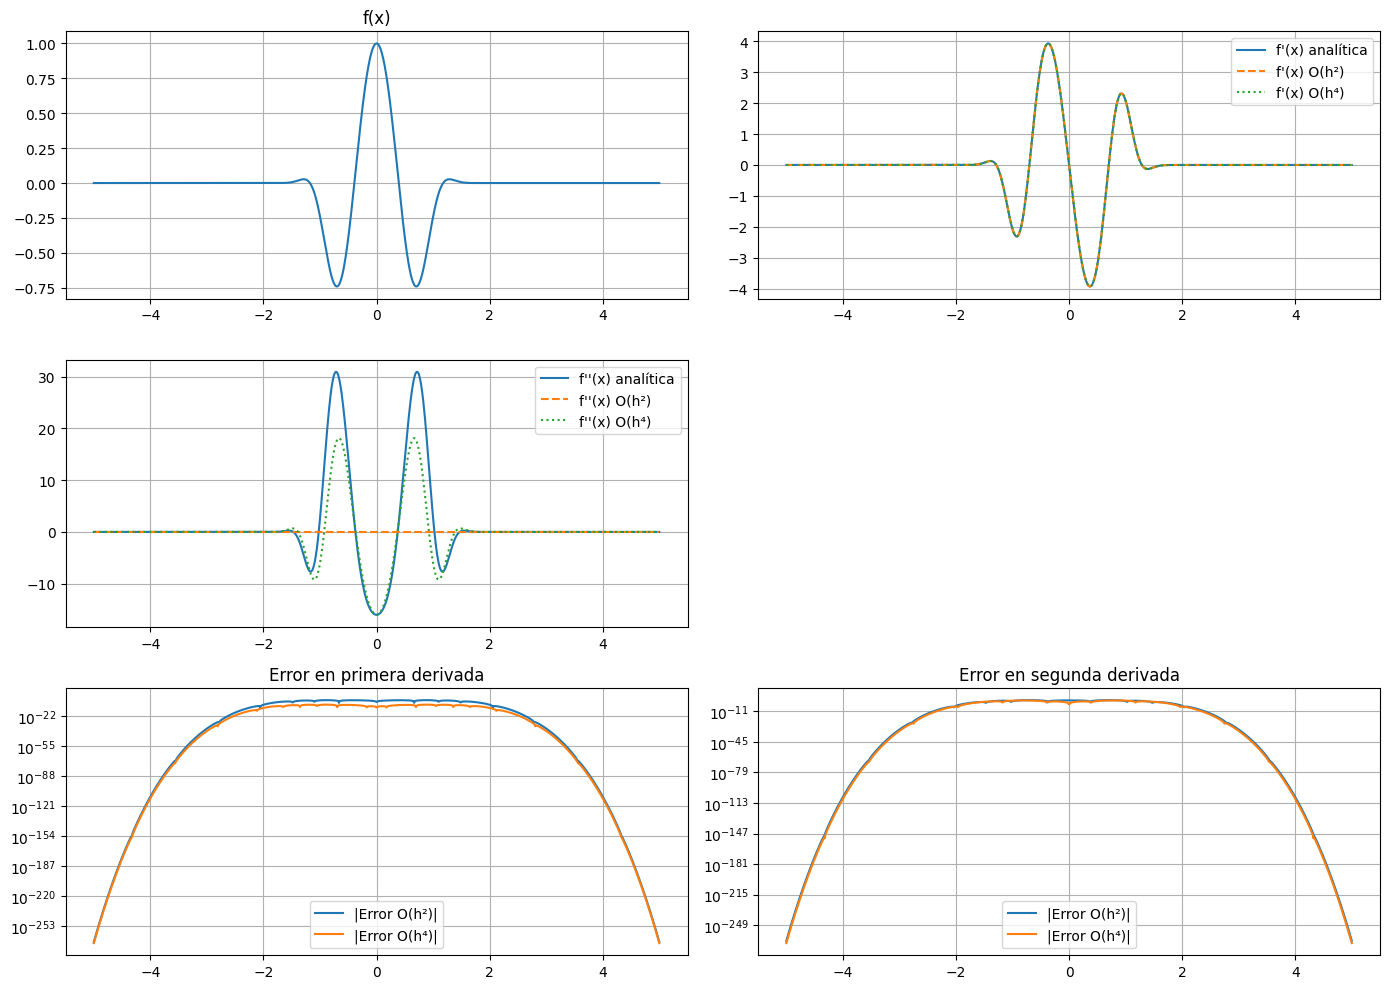

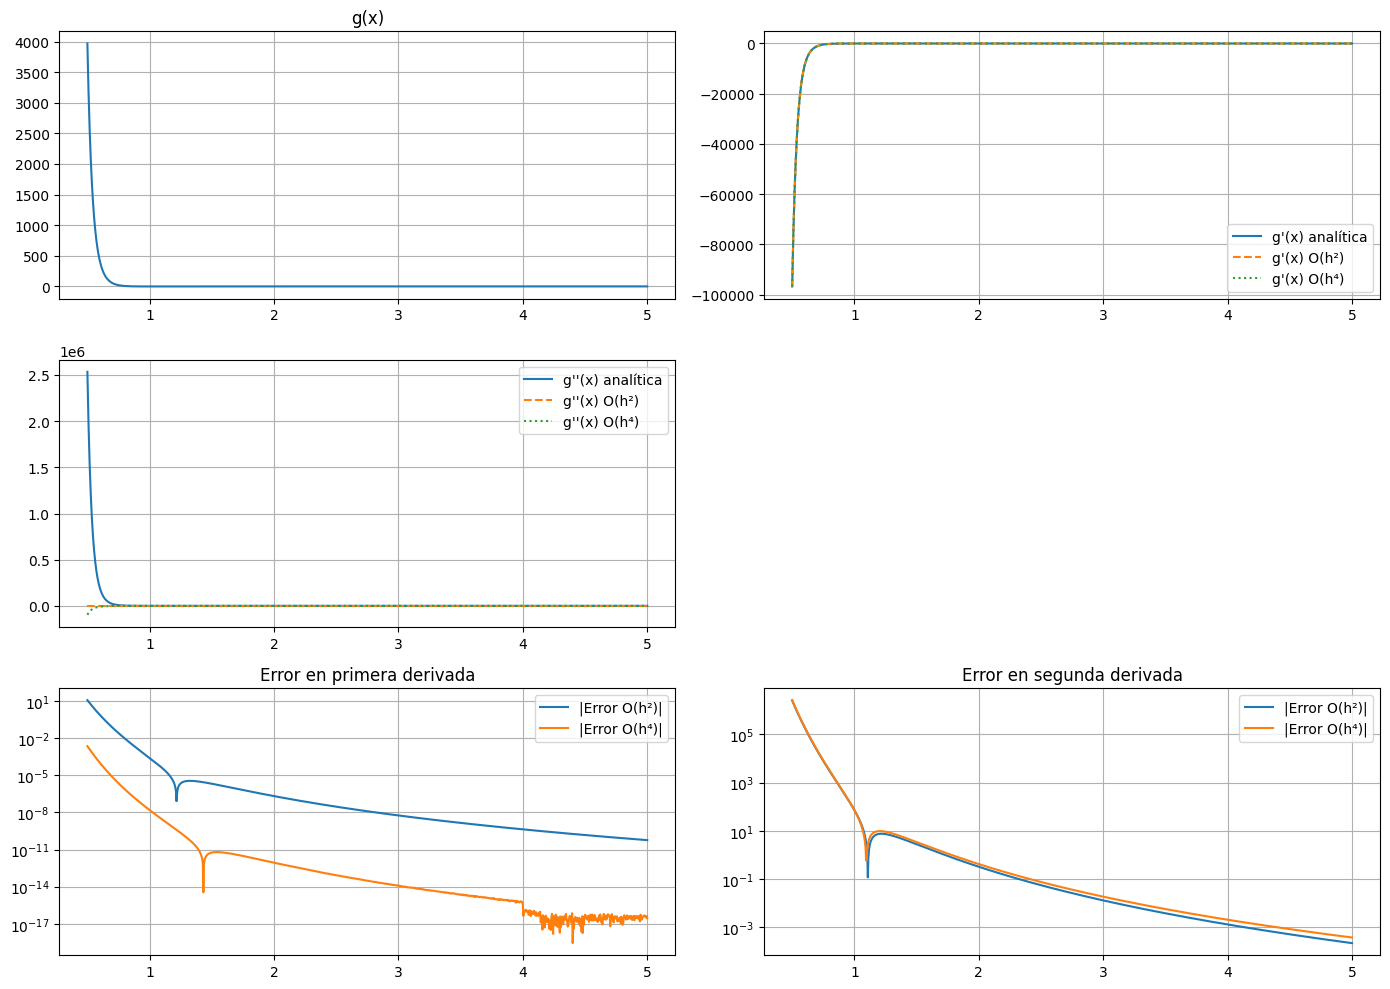

In [ ]:
def plot_all(x, fx, fp_ana, fpp_ana, fp_oh2, fp_oh4, fpp_oh2, fpp_oh4, name='f'):
    plt.figure(figsize=(14, 10))

    # Función
    plt.subplot(3, 2, 1)
    plt.plot(x, fx, label=f'{name}(x)')
    plt.title(f'{name}(x)')
    plt.grid()

    # Primera derivada
    plt.subplot(3, 2, 2)
    plt.plot(x, fp_ana, label=f'{name}\'(x) analítica')
    plt.plot(x, fp_oh2, '--', label=f'{name}\'(x) O(h²)')
    plt.plot(x, fp_oh4, ':', label=f'{name}\'(x) O(h⁴)')
    plt.legend()
    plt.grid()

    # Segunda derivada
    plt.subplot(3, 2, 3)
    plt.plot(x, fpp_ana, label=f'{name}\'\'(x) analítica')
    plt.plot(x, fpp_oh2, '--', label=f'{name}\'\'(x) O(h²)')
    plt.plot(x, fpp_oh4, ':', label=f'{name}\'\'(x) O(h⁴)')
    plt.legend()
    plt.grid()

    # Error de primera derivada
    plt.subplot(3, 2, 5)
    plt.plot(x, np.abs(fp_ana - fp_oh2), label='|Error O(h²)|')
    plt.plot(x, np.abs(fp_ana - fp_oh4), label='|Error O(h⁴)|')
    plt.yscale('log')
    plt.legend()
    plt.title('Error en primera derivada')
    plt.grid()

    # Error de segunda derivada
    plt.subplot(3, 2, 6)
    plt.plot(x, np.abs(fpp_ana - fpp_oh2), label='|Error O(h²)|')
    plt.plot(x, np.abs(fpp_ana - fpp_oh4), label='|Error O(h⁴)|')
    plt.yscale('log')
    plt.legend()
    plt.title('Error en segunda derivada')
    plt.grid()

    plt.tight_layout()
    plt.show()

# Ejecutar para f(x)
plot_all(x, f(x), f_prim_ana, f_sec_ana, f_num_oh2, f_num_oh4, f_sec_oh2, f_sec_oh4, name='f')

# Ejecutar para g(x)
plot_all(y, g(y), g_prim_ana, g_sec_ana, g_num_oh2, g_num_oh4, g_sec_oh2, g_sec_oh4, name='g')

Para este ejercicio necesitamos comparar por medio de aproximaciones numéricas el O(h^2) y el O(h^4) para para asi comprobar que que el error disminuye conforme *h* disminuye, con esto en mente esperariamos que en O(h^4) el error permanesca por debajo de 10^-4.

Por lo cual el valor de *h* debe ser lo suficientemente pequeño para que la diferencia entre la derivada analítica y la numérica sea mínima.

In [ ]:
error_prim_oh2 = np.abs(g_prim_ana - g_num_oh2)
error_prim_oh4 = np.abs(g_prim_ana - g_num_oh4)
error_sec_oh2 = np.abs(g_sec_ana - g_sec_oh2)
error_sec_oh4 = np.abs(g_sec_ana - g_sec_oh4)


epsilon = 1e-16
error_prim_oh2 += epsilon
error_prim_oh4 += epsilon
error_sec_oh2 += epsilon
error_sec_oh4 += epsilon



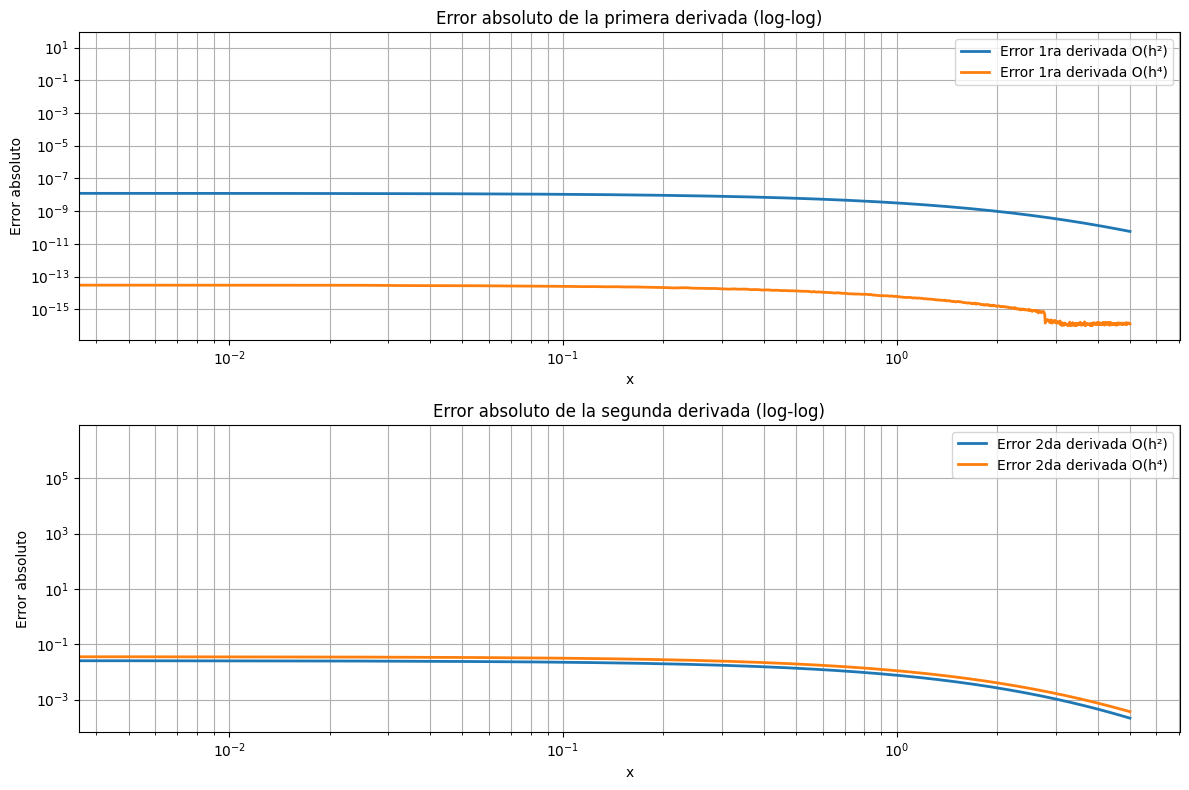

In [ ]:

plt.figure(figsize=(12, 8))

# Primera derivada
plt.subplot(2, 1, 1)
plt.loglog(x, error_prim_oh2, label="Error 1ra derivada O(h²)", linewidth=2)
plt.loglog(x, error_prim_oh4, label="Error 1ra derivada O(h⁴)", linewidth=2)
plt.title("Error absoluto de la primera derivada (log-log)")
plt.xlabel("x")
plt.ylabel("Error absoluto")
plt.grid(True, which="both")
plt.legend()

# Segunda derivada
plt.subplot(2, 1, 2)
plt.loglog(x, error_sec_oh2, label="Error 2da derivada O(h²)", linewidth=2)
plt.loglog(x, error_sec_oh4, label="Error 2da derivada O(h⁴)", linewidth=2)
plt.title("Error absoluto de la segunda derivada (log-log)")
plt.xlabel("x")
plt.ylabel("Error absoluto")
plt.grid(True, which="both")
plt.legend()

plt.tight_layout()
plt.show()

Para esta parte solo queria comprobar que para O(h^4) sus errores van a hacer mucho menores a los de O(h^2)

Conclusiones:


**Ejercicio 3**

In [ ]:
# Para la integral:
def f2(x):
    return f(x)**2

# Regla de Simpson compuesta
def simpson_compuesta(f, a, b, n):
    if n % 2 == 1:
        n += 1
    h = (b - a) / n
    x = np.linspace(a, b, n + 1)
    y = f(x)
    S = y[0] + y[-1] + 4 * np.sum(y[1:n:2]) + 2 * np.sum(y[2:n-1:2])
    return h * S / 3

# Número de sub-intervalos
n = 1000

# Cálculo de las integrales
I_a = simpson_compuesta(f, 0, 5, n)
I_b = simpson_compuesta(f2, -5, 5, n)
I_c = simpson_compuesta(g, 0.5, 5, n)

print(f"(a) ∫₀⁵ f(x) dx ≈ {I_a:.8f}")
print(f"(b) ∫₋₅⁵ f²(x) dx ≈ {I_b:.8f}")
print(f"(c) ∫₀․₅⁵ g(x) dx ≈ {I_c:.8f}")

(a) ∫₀⁵ f(x) dx ≈ -0.07095978
(b) ∫₋₅⁵ f²(x) dx ≈ 0.76070415
(c) ∫₀․₅⁵ g(x) dx ≈ 173.38210806


Se implemento la regla de simpson dado que que es una aproximada basada en la interpolación de los puntos de la función con un polinomio de segundo grado. Lo cual le da mayor exactitud.

In [ ]:
import numpy as np

# Funciones ya definidas:
def f(x):
    return np.exp(-x**4) * np.cos(4*x)

def g(x):
    return -2 / x**6 + 1 / x**12

# Para la integral (b):
def f2(x):
    return f(x)**2

# Regla de Simpson compuesta
def simpson_compuesta(f, a, b, n):
    if n % 2 == 1:
        n += 1  # Simpson requiere n par
    h = (b - a) / n
    x = np.linspace(a, b, n + 1)
    y = f(x)
    S = y[0] + y[-1] + 4 * np.sum(y[1:n:2]) + 2 * np.sum(y[2:n-1:2])
    return h * S / 3

In [ ]:
#Función para comparar la integral con diferentes n
def comparar_integrales(f, a, b, valores_n):
    resultados = {}
    for n in valores_n:
        integral = simpson_compuesta(f, a, b, n)
        resultados[n] = integral
        print(f"n = {n}, Integral ≈ {integral:.8f}")
    return resultados

# Valores de n que se van a probar
valores_n = [1000, 5000, 10000]

# Comparar integrales para las diferentes funciones
print("Integral de f(x) en [0, 5]:")
resultados_f = comparar_integrales(f, 0, 5, valores_n)

print("\nIntegral de f²(x) en [-5, 5]:")
resultados_f2 = comparar_integrales(f2, -5, 5, valores_n)

print("\nIntegral de g(x) en [0.5, 5]:")
resultados_g = comparar_integrales(g, 0.5, 5, valores_n)

Integral de f(x) en [0, 5]:
n = 1000, Integral ≈ -0.07095978
n = 5000, Integral ≈ -0.07095978
n = 10000, Integral ≈ -0.07095978

Integral de f²(x) en [-5, 5]:
n = 1000, Integral ≈ 0.76070415
n = 5000, Integral ≈ 0.76070415
n = 10000, Integral ≈ 0.76070415

Integral de g(x) en [0.5, 5]:
n = 1000, Integral ≈ 173.38210806
n = 5000, Integral ≈ 173.38194644
n = 10000, Integral ≈ 173.38194620


**Ejercicio 4**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import cumulative_trapezoid # Import cumulative_trapezoid instead of cumtrapz

# Funciones definidas previamente
def f(x):
    return np.exp(-x**4) * np.cos(4*x)

def g(x):
    return -2 / x**6 + 1 / x**12

# Intervalos
x_f = np.linspace(0, 5, 1000)
x_g = np.linspace(0.5, 5, 200)

# Cálculo de las primitivas (integrales acumuladas)
F_x = cumulative_trapezoid(f(x_f), x_f, initial=0)
G_x = cumulative_trapezoid(g(x_g), x_g, initial=0)

# Gráficas
plt.figure(figsize=(10, 6))


<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

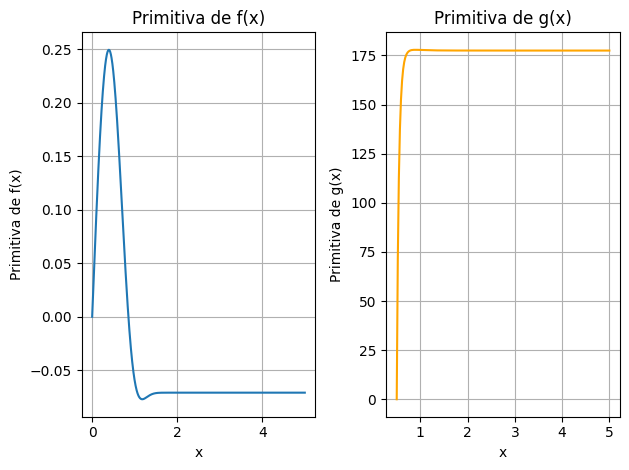

In [ ]:
# Gráfica de la primitiva de f(x)
plt.subplot(1, 2, 1)
plt.plot(x_f, F_x, label="Primitiva de f(x)")
plt.title("Primitiva de f(x)")
plt.xlabel("x")
plt.ylabel("Primitiva de f(x)")
plt.grid(True)

# Gráfica de la primitiva de g(x)
plt.subplot(1, 2, 2)
plt.plot(x_g, G_x, label="Primitiva de g(x)", color="orange")
plt.title("Primitiva de g(x)")
plt.xlabel("x")
plt.ylabel("Primitiva de g(x)")
plt.grid(True)

# Mostrar las gráficas
plt.tight_layout()
plt.show()